# Overview
In advance of the first 24-hour virtual Women in Data Science (WiDS) Worldwide Conference March 8, 2021, we invite you to build a team, hone your data science skills, and join us for the 4th Annual WiDS Datathon focused on social impact. Register now!

The WiDS Datathon 2021 focuses on patient health, with an emphasis on the chronic condition of diabetes, through data from MIT’s GOSSIS (Global Open Source Severity of Illness Score) initiative. Brought to you by the WiDS Worldwide team at Stanford, the West Big Data Innovation Hub, and the WiDS Datathon Committee, this year’s datathon is open until March 1, 2021. Winners will be announced at the WiDS Conference via livestream, reaching a community of 100,000+ data enthusiasts across more than 85 countries.

# Background
Getting a rapid understanding of the context of a patient’s overall health has been particularly important during the COVID-19 pandemic as healthcare workers around the world struggle with hospitals overloaded by patients in critical condition. Intensive Care Units (ICUs) often lack verified medical histories for incoming patients. A patient in distress or a patient who is brought in confused or unresponsive may not be able to provide information about chronic conditions such as heart disease, injuries, or diabetes. Medical records may take days to transfer, especially for a patient from another medical provider or system.

Knowledge about chronic conditions such as diabetes can inform clinical decisions about patient care and ultimately improve patient outcomes. Learn more about the global scale of diabetes on our Datathon News page, and make sure you are subscribed to the WiDS Datathon Mailing List to receive the latest updates, tutorials, and articles.

## First step to get data

In [1]:
# Import library
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train = pd.read_csv('TrainingWiDS2021.csv')
test = pd.read_csv('UnlabeledWiDS2021.csv')

In [3]:
test.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,1,144740,10141,72,NaN,0,Caucasian,F,152.4,Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
1,2,141990,10141,86,NaN,0,Caucasian,F,175.3,Emergency Department,...,NaN,NaN,NaN,0,0,0,0,0,0,0
2,3,142038,10141,72,NaN,0,Caucasian,F,162.6,Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
3,4,138628,10141,66,NaN,0,Caucasian,M,177.8,Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
4,5,141682,10141,89,NaN,0,Caucasian,M,170.2,Direct Admit,...,NaN,NaN,NaN,0,0,0,0,0,0,0


In [4]:
train.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,...,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,...,51.0,51.0,0,0,0,0,0,0,0,1
2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,...,NaN,NaN,0,0,0,0,0,0,0,0
3,4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,...,337.0,337.0,0,0,0,0,0,0,0,0
4,5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


In [5]:
train.shape

(130157, 181)

In [6]:
df_null = train.isnull().sum().sort_values(ascending=False)
df_null[df_null != 0]

h1_bilirubin_min    119861
h1_bilirubin_max    119861
h1_albumin_min      119005
h1_albumin_max      119005
h1_lactate_max      118467
                     ...  
d1_sysbp_max           271
d1_heartrate_min       262
d1_heartrate_max       262
icu_admit_source       240
gender                  66
Length: 160, dtype: int64

In [7]:
train.describe()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
count,130157.000000,130157.000000,130157.000000,125169.000000,125667.000000,130157.000000,128080.000000,130157.000000,130157.000000,130157.0,...,16760.000000,16760.000000,130157.00000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000
mean,65079.000000,213000.856519,106.102131,61.995103,29.110260,0.189840,169.607219,662.428344,0.839933,0.0,...,247.525419,239.617358,0.00103,0.016081,0.013599,0.025669,0.007307,0.004187,0.020852,0.216285
std,37573.233831,38109.828146,63.482277,16.822880,8.262776,0.392176,10.833085,304.259843,2.485337,0.0,...,131.440167,128.562211,0.03207,0.125786,0.115819,0.158146,0.085166,0.064574,0.142888,0.411712
min,1.000000,147000.000000,1.000000,0.000000,14.844926,0.000000,137.200000,82.000000,-0.250000,0.0,...,42.000000,38.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32540.000000,180001.000000,49.000000,52.000000,23.598006,0.000000,162.500000,427.000000,0.045833,0.0,...,144.000000,138.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65079.000000,213014.000000,112.000000,64.000000,27.564749,0.000000,170.100000,653.000000,0.155556,0.0,...,228.125000,218.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,97618.000000,246002.000000,165.000000,75.000000,32.803127,0.000000,177.800000,969.000000,0.423611,0.0,...,333.000000,324.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,130157.000000,279000.000000,204.000000,89.000000,67.814990,1.000000,195.590000,1111.000000,175.627778,0.0,...,720.000000,654.813793,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we can see, we have some id columns - encounter_id, patient_id, hospital_id, icu_id

There are some columns like readmission_status which only have value 0 and can be ignored since they don't provide any extra information.
We also have the target column - diabetes_mellitus which is already numerical (0 and 1). Other important columns we have are:

    - age - Age of the patient
    - bmi - BMI of the patient (Since we already have information about BMI, we can ignore height and weight)
    - elective_surgery - Categorical feature
    - Others

We also have some features providing apache scores.

In [8]:
train['diabetes_mellitus'].value_counts()

0    102006
1     28151
Name: diabetes_mellitus, dtype: int64

In [9]:
#Comment: The ratio is 5/1 --> the train dataset has imbalance issue 

## EDA 

Credit from this kernel https://www.kaggle.com/vishwesh5/patient-survival

In [10]:
#Let's now refer to the dictionary file to get a better understanding of various columns present in the dataset.
dictionary = pd.read_csv('DataDictionaryWiDS2021.csv')

In [11]:
dictionary.head()

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
0,identifier,encounter_id,None,integer,Unique identifier associated with a patient un...,None
1,identifier,hospital_id,None,integer,Unique identifier associated with a hospital,None
2,demographic,age,Years,numeric,The age of the patient on unit admission,None
3,demographic,bmi,kilograms/metres^2,string,The body mass index of the person on unit admi...,21.5
4,demographic,elective_surgery,None,binary,Whether the patient was admitted to the hospit...,0


In [12]:
#The category column gives information about the category of the feature
dictionary.Category.value_counts()

labs                  60
vitals                52
APACHE covariate      28
labs blood gas        16
demographic           16
APACHE comorbidity     7
identifier             2
Name: Category, dtype: int64

In [13]:
#Let's go over each category one by one.
def selectCategory(df,category):
    """
    This function will return the dataset
    with information about the specified
    category
    """
    return df[df.Category==category]

In [14]:
train.shape, dictionary.shape

((130157, 181), (181, 6))

### APACHE covariate

In [15]:
cols = selectCategory(dictionary,"APACHE covariate")
cols.head()

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
17,APACHE covariate,albumin_apache,g/L,numeric,The albumin concentration measured during the ...,30
18,APACHE covariate,apache_2_diagnosis,None,string,The APACHE II diagnosis for the ICU admission,308
19,APACHE covariate,apache_3j_diagnosis,None,string,The APACHE III-J sub-diagnosis code which best...,1405
20,APACHE covariate,apache_post_operative,None,binary,The APACHE operative status; 1 for post-operat...,1
21,APACHE covariate,arf_apache,None,binary,Whether the patient had acute renal failure du...,0


There are a lot of apaches which belong to this category. Most of them provide info about diabetes_mellitus

Let's check about the correlation among variables 

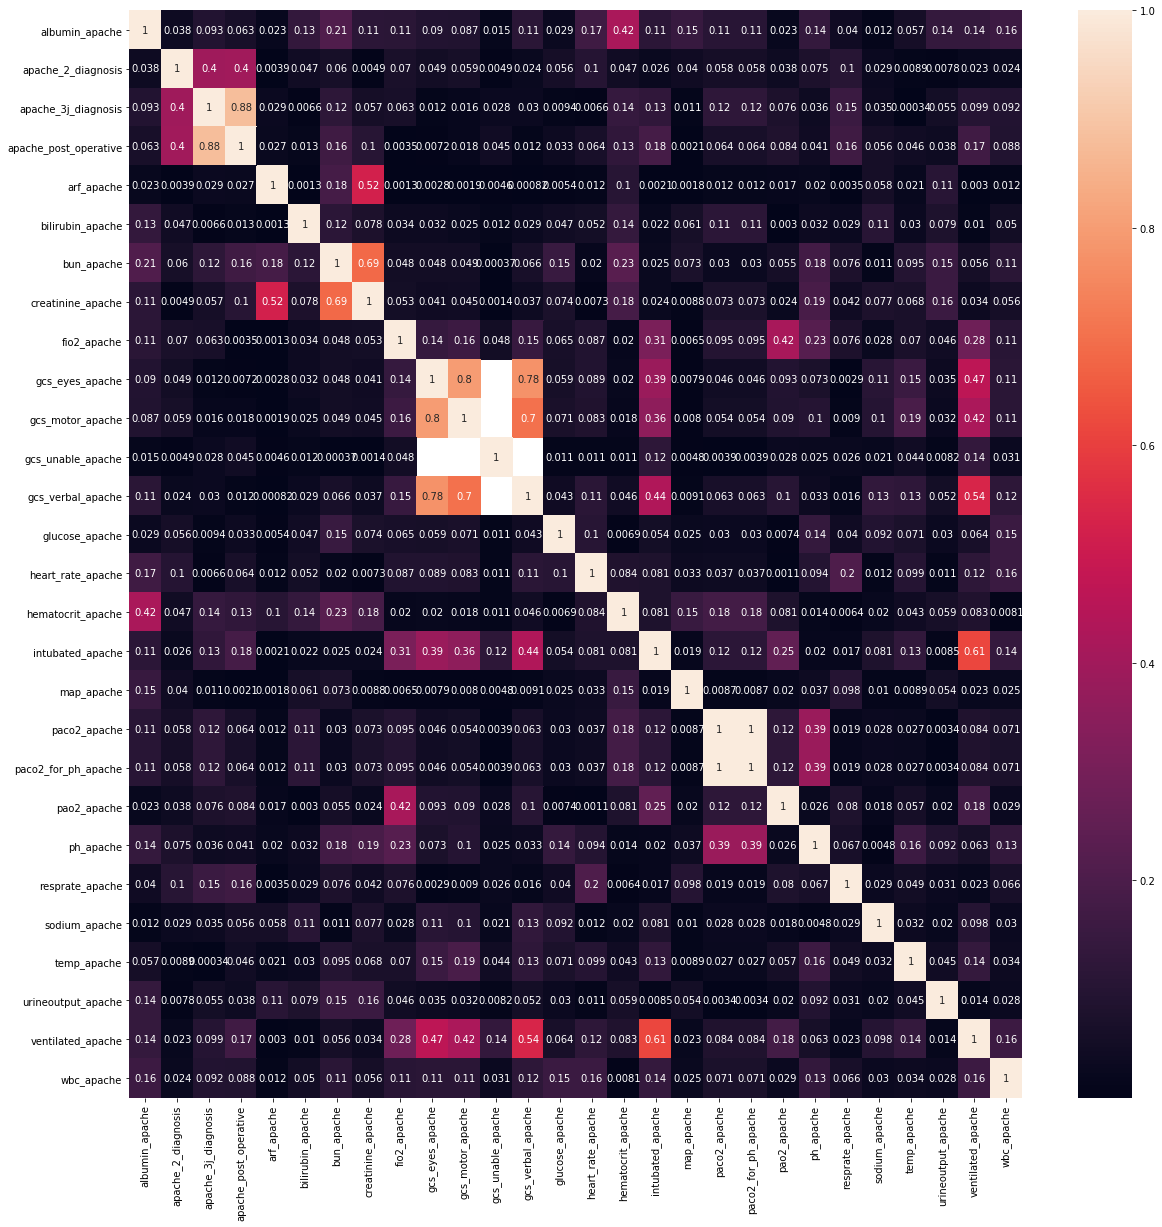

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(abs(train[cols["Variable Name"]].corr()),annot=True)
plt.show()

From the above correlation heatmap, we can see that there is high correlation between some columns

In [17]:
# Columns to drop
toDrop = []


### Vitals

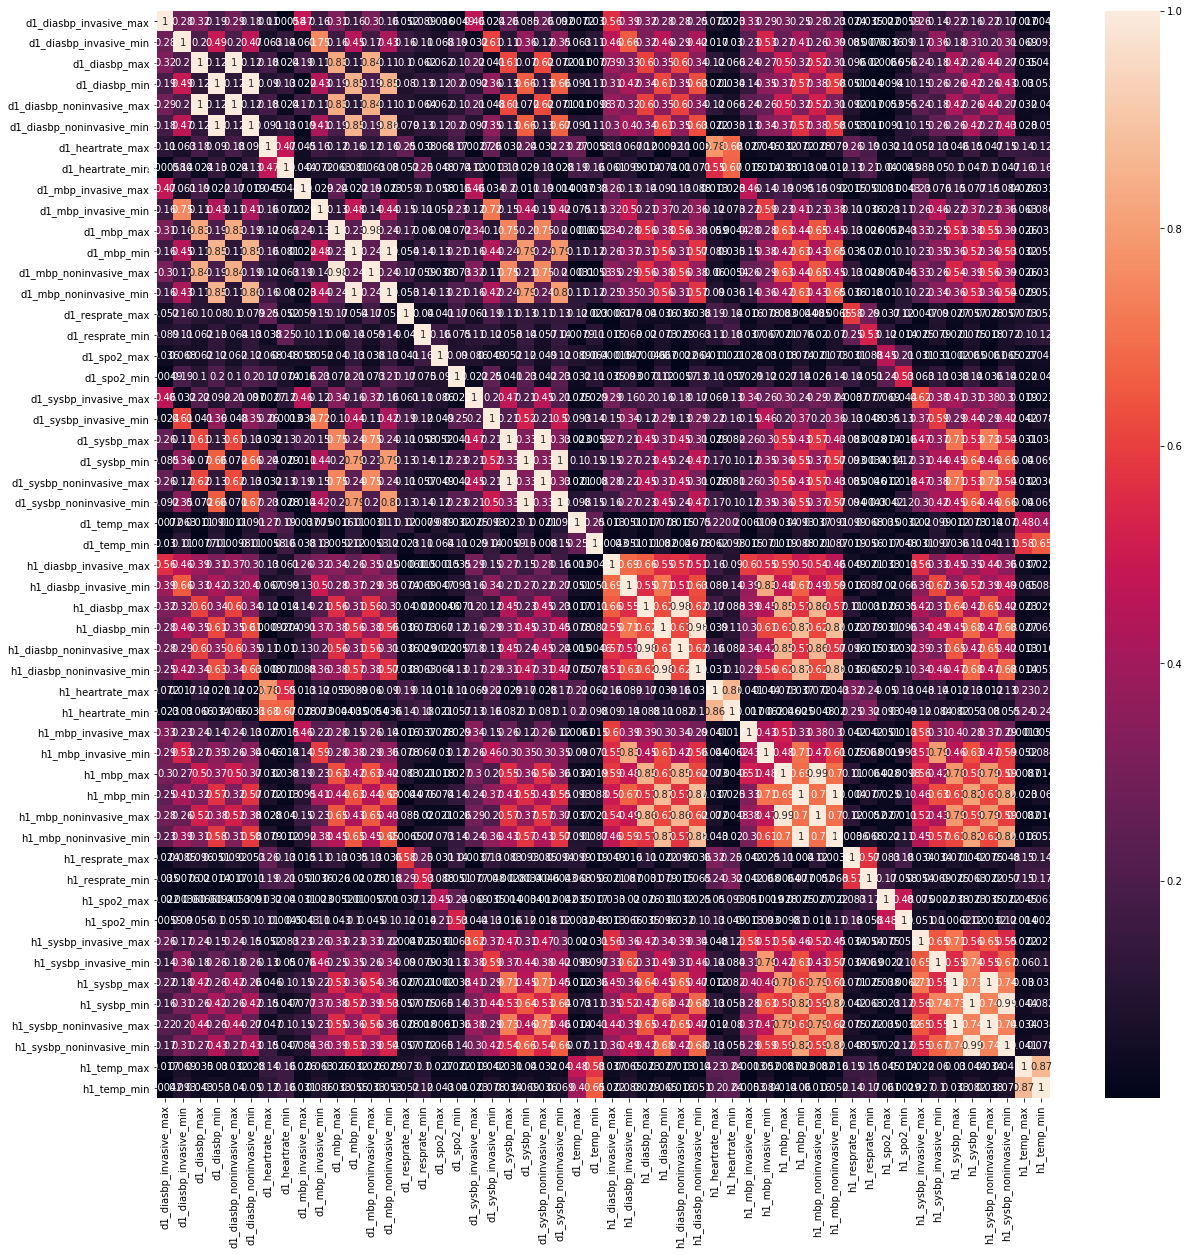

In [18]:
cols = selectCategory(dictionary,"vitals")

plt.figure(figsize=(20,20))
sns.heatmap(abs(train[cols["Variable Name"]].corr()),annot=True)
plt.show()

As we can see above, there are some high correlation columns, but since these are vitals about patients, it's better to not drop them for now.



### Identifier

In [19]:
cols = selectCategory(dictionary,"identifier")
cols

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
0,identifier,encounter_id,None,integer,Unique identifier associated with a patient un...,None
1,identifier,hospital_id,None,integer,Unique identifier associated with a hospital,None


In [20]:
for i in cols.Description.values:
    print(i)

Unique identifier associated with a patient unit stay
Unique identifier associated with a hospital


In [21]:
train.encounter_id.nunique(),train.hospital_id.nunique(),len(train.index)

(130157, 204, 130157)

In [22]:
toDrop.append("encounter_id")
toDrop.append("hospital_id")


### APACHE comorbidity 

In [23]:
cols = selectCategory(dictionary,"APACHE comorbidity")
cols

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
173,APACHE comorbidity,aids,None,binary,Whether the patient has a definitive diagnosis...,1
174,APACHE comorbidity,cirrhosis,None,binary,Whether the patient has a history of heavy alc...,1
175,APACHE comorbidity,hepatic_failure,None,binary,Whether the patient has cirrhosis and addition...,1
176,APACHE comorbidity,immunosuppression,None,binary,Whether the patient has their immune system su...,1
177,APACHE comorbidity,leukemia,None,binary,Whether the patient has been diagnosed with ac...,1
178,APACHE comorbidity,lymphoma,None,binary,Whether the patient has been diagnosed with no...,1
179,APACHE comorbidity,solid_tumor_with_metastasis,None,binary,Whether the patient has been diagnosed with an...,1


 All of the above features provide information about the specific disease that a patient was diagnosed with. While there can be some correlation between these features based on symptoms, it's better to keep all of them as it is. We can also fill the missing values with 0 in the case of each of these features.

In [24]:
for col in cols["Variable Name"].values:
    train[col] = train[col].fillna(0)

### Labs blood gas

In [25]:
cols = selectCategory(dictionary,"labs blood gas")
cols

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
157,labs blood gas,d1_arterial_pco2_max,Millimetres of mercury,numeric,The highest arterial partial pressure of carbo...,40
158,labs blood gas,d1_arterial_pco2_min,Millimetres of mercury,numeric,The lowest arterial partial pressure of carbon...,40
159,labs blood gas,d1_arterial_ph_max,None,numeric,The highest arterial pH for the patient during...,7.4
160,labs blood gas,d1_arterial_ph_min,None,numeric,The lowest arterial pH for the patient during ...,7.4
161,labs blood gas,d1_arterial_po2_max,Millimetres of mercury,numeric,The highest arterial partial pressure of oxyge...,80
162,labs blood gas,d1_arterial_po2_min,Millimetres of mercury,numeric,The lowest arterial partial pressure of oxygen...,80
163,labs blood gas,d1_pao2fio2ratio_max,Fraction,numeric,The highest fraction of inspired oxygen for th...,0.21
164,labs blood gas,d1_pao2fio2ratio_min,Fraction,numeric,The lowest fraction of inspired oxygen for the...,0.21
165,labs blood gas,h1_arterial_pco2_max,Millimetres of mercury,numeric,The highest arterial partial pressure of carbo...,40
166,labs blood gas,h1_arterial_pco2_min,Millimetres of mercury,numeric,The lowest arterial partial pressure of carbon...,40


In [26]:
for i in range(len(cols.index)):
    print("{}: {}".format(cols["Variable Name"].values[i],cols.Description.values[i]))

d1_arterial_pco2_max: The highest arterial partial pressure of carbon dioxide for the patient during the first 24 hours of their unit stay
d1_arterial_pco2_min: The lowest arterial partial pressure of carbon dioxide for the patient during the first 24 hours of their unit stay
d1_arterial_ph_max: The highest arterial pH for the patient during the first 24 hours of their unit stay
d1_arterial_ph_min: The lowest arterial pH for the patient during the first 24 hours of their unit stay
d1_arterial_po2_max: The highest arterial partial pressure of oxygen for the patient during the first 24 hours of their unit stay
d1_arterial_po2_min: The lowest arterial partial pressure of oxygen for the patient during the first 24 hours of their unit stay
d1_pao2fio2ratio_max: The highest fraction of inspired oxygen for the patient during the first 24 hours of their unit stay
d1_pao2fio2ratio_min: The lowest fraction of inspired oxygen for the patient during the first 24 hours of their unit stay
h1_arteria

As we can see from the description, these set of features provide information about the patient's vitals during the first hour and the first 24 hours of their stay. Let's see if there is any correlation in these columns.

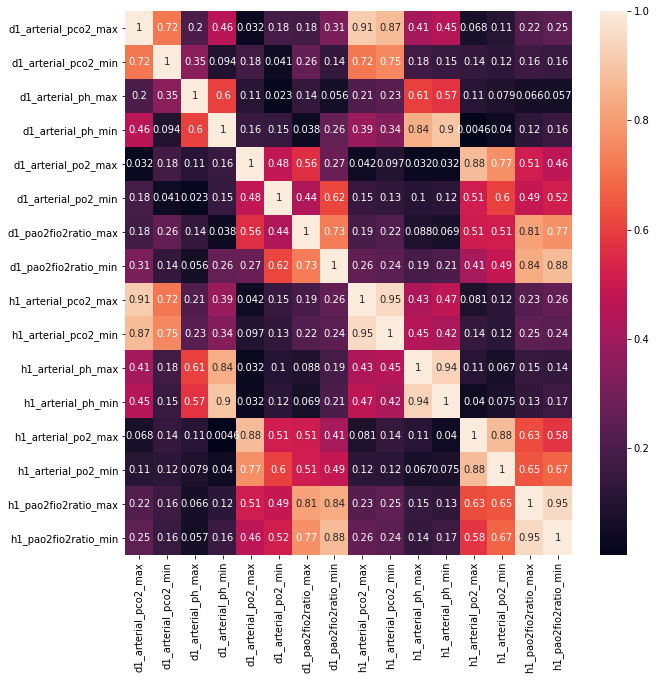

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(abs(train[cols["Variable Name"]].corr()),annot=True)
plt.show()

Since we can see some correlation in daily and hourly attributes, we can drop the daily attributes and focus on hourly features. The reason being that the hourly features will be available much sooner than daily ones and that's why, based on those features, the suitable action can be taken much sooner.

### Demographic

In [28]:
cols = selectCategory(dictionary,"demographic")
cols

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
2,demographic,age,Years,numeric,The age of the patient on unit admission,None
3,demographic,bmi,kilograms/metres^2,string,The body mass index of the person on unit admi...,21.5
4,demographic,elective_surgery,None,binary,Whether the patient was admitted to the hospit...,0
5,demographic,ethnicity,None,string,The common national or cultural tradition whic...,Caucasian
6,demographic,gender,None,string,The genotypical sex of the patient,F
7,demographic,height,centimetres,numeric,The height of the person on unit admission,180
8,demographic,hospital_admit_source,None,string,The location of the patient prior to being adm...,Home
9,demographic,icu_admit_source,None,string,The location of the patient prior to being adm...,Operating room
10,demographic,icu_admit_type,None,string,The type of unit admission for the patient,Cardiothoracic
11,demographic,icu_id,None,integer,A unique identifier for the unit to which the ...,None


Let's go over each column in this category, one by one. We will start off with diabetes_mellitus which is our target column as well.

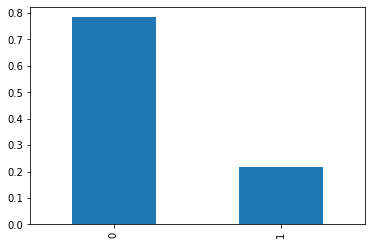

In [29]:
train['diabetes_mellitus'].value_counts(normalize=True).plot(kind='bar')

From the above bar graph, we can clearly see the imbalance in the dataset.

The next column we will go over is the age column which describes the age of the patient.

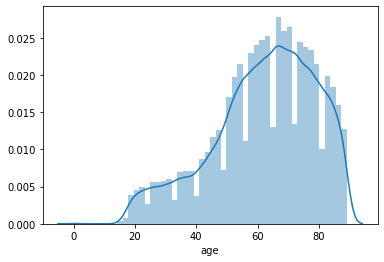

In [30]:
sns.distplot(train["age"])

We can see that most patients are between the age of 60 to 80, which clearly shows a skewed distribution.
Next, we go with BMI

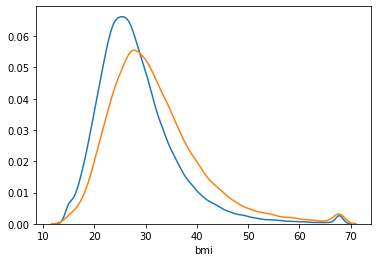

In [31]:
sns.distplot(train[train["diabetes_mellitus"]==0]["bmi"],hist=False)
sns.distplot(train[train["diabetes_mellitus"]==1]["bmi"],hist=False)

Notice that there is a slight differences in distribution of bmi for target variable.

We can see that there is a higher distribution of bmi lying in "overweight" (25.0 to 29.9), "obese" (30.0 and above) and the "normal" (18.5 to 24.9), in the same order. We can verify the same as follows.

In [32]:
def bmiCategory(bmi):
    if bmi < 18.5:
        return "underweight"
    elif bmi < 24.9:
        return "normal"
    elif bmi < 29.9:
        return "overweight"
    else:
        return "obese"

train["bmi_category"] = train["bmi"].apply(bmiCategory)

In [33]:
test["bmi_category"] = test["bmi"].apply(bmiCategory)

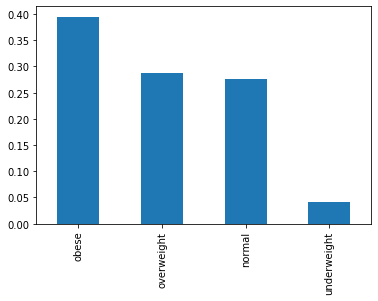

In [34]:
train["bmi_category"].value_counts(normalize=True).plot(kind='bar')

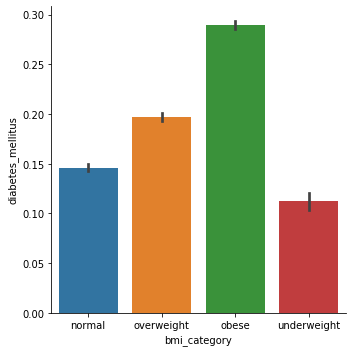

In [35]:
sns.catplot(x="bmi_category",y="diabetes_mellitus",kind="bar",data=train)

As we saw above, bmi in itself was not having any major effect, but as soon as we converted it to the categories, we can see that some categories like obese have a larger ratio of diabetes_mellitus and thus would be a better choice than bmi.

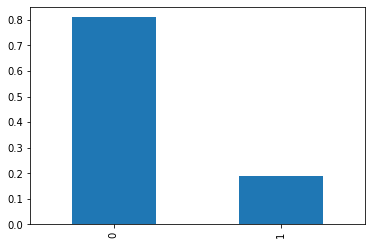

In [36]:
# The next column is elective surgery
train['elective_surgery'].value_counts(normalize=True).plot(kind='bar')

We can see that around 80% patients were not admitted for elective surgery. Let's see if there is any correlation between this feature and the target feature.

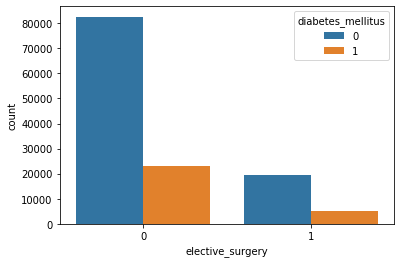

In [37]:
sns.countplot(x="elective_surgery",hue="diabetes_mellitus",data=train)

The above plot does not provide us information about the proportion of diabetes_mellitus with respect to elective surgery. Let's try and obtain that.

In [38]:
train.groupby("elective_surgery")["diabetes_mellitus"].sum()/train.groupby("elective_surgery")["diabetes_mellitus"].count() * 100

elective_surgery
0    21.726349
1    21.210895
Name: diabetes_mellitus, dtype: float64

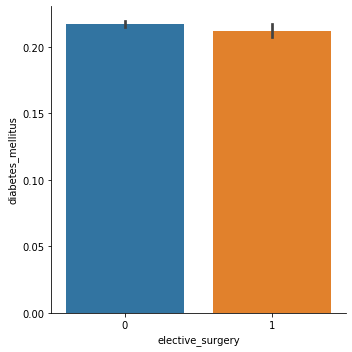

In [39]:
sns.catplot(x="elective_surgery",y="diabetes_mellitus",kind="bar",data=train)

We can see that about 22% of the patients who were admitted not for an elective surgery got sick, whereas the percentage is 21% in case when the patients were admitted for an elective surgery. This might be because elective surgeries are usually not very serious in nature.

Next, let's look at the ethnicity column.

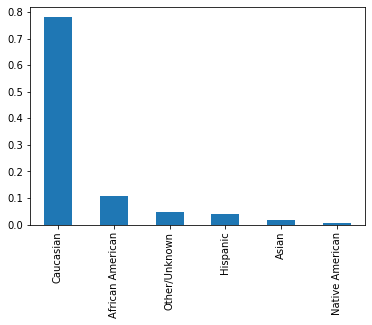

In [40]:
train["ethnicity"].value_counts(normalize=True).plot(kind='bar')

We can see that there is a larger proportion (close to 80%) of patients from one specific ethnicity. This also shows that if we use this to train our model, we might end up with higher bias towards ethnicity, which is not desirable.

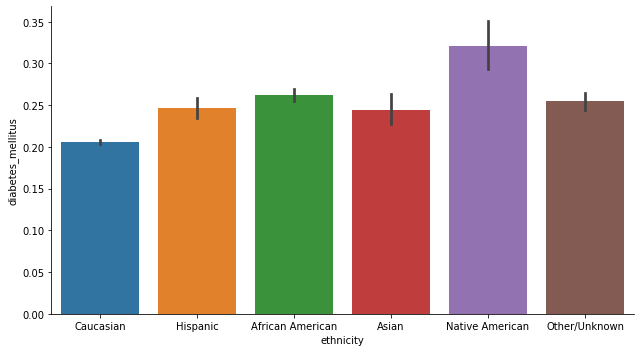

In [41]:
sns.catplot(x="ethnicity",y="diabetes_mellitus",kind="bar",data=train,aspect=1.8)
plt.show()

As we can see, the percentage of diabetes_mellitus are about uniform for each ethnicity, and thus, ethnicity column can be dropped from the dataframe.

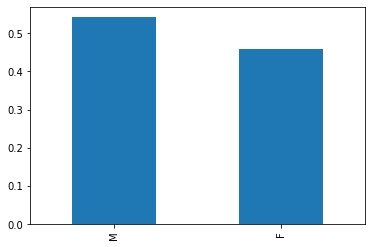

In [42]:
train["gender"].value_counts(normalize=True).plot(kind='bar')

There are about 55% male and 45% female patients which shows that in terms of gender, the dataset is about balanced.

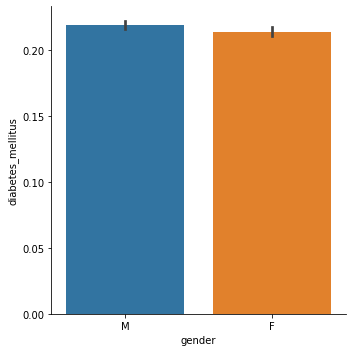

In [43]:
sns.catplot(x="gender",y="diabetes_mellitus",kind="bar",data=train)
plt.show()

As we can see, there is no significant effect of gender on the diabetes_mellitus column and thus, can be dropped.
Now, let's look at the height column.

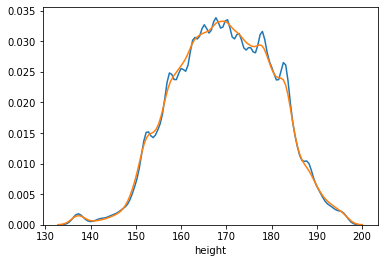

In [44]:
sns.distplot(train[train["diabetes_mellitus"]==0]["height"],hist=False)
sns.distplot(train[train["diabetes_mellitus"]==1]["height"],hist=False)

As we can see, height is not having any significant effect on the target column and thus can be dropped.

Next, we will look at hospital_admit_source column which gives information about where the patient was before getting admitted to the hospital.

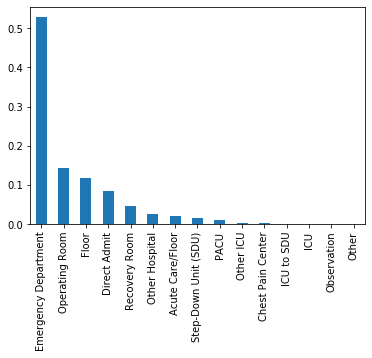

In [45]:
train["hospital_admit_source"].value_counts(normalize=True).plot(kind='bar')

We can see that most patients (roughly 55%) were present in the emergency department before getting admitted to the hospital.

Let's check if this has any effect on the target variable.

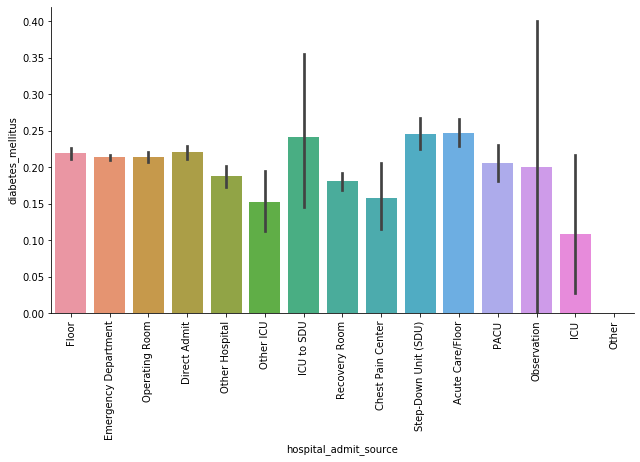

In [46]:
sns.catplot(x="hospital_admit_source",y="diabetes_mellitus",kind="bar",data=train,aspect=1.8)
plt.xticks(rotation=90)
plt.show()

We can clearly see not having a variation in percentage of diabetes_mellitus for different hospital admit sources and thus, it is a feature which we can drop.



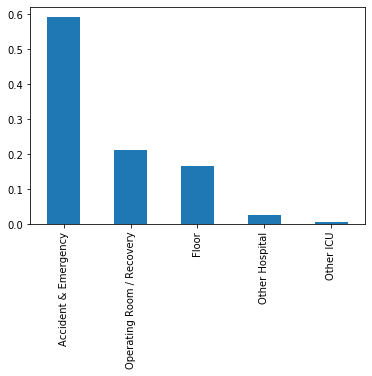

In [47]:
train["icu_admit_source"].value_counts(normalize=True).plot(kind='bar')

As expected, most patients from accident/emergency and OR/recovery are admitted to the ICU.

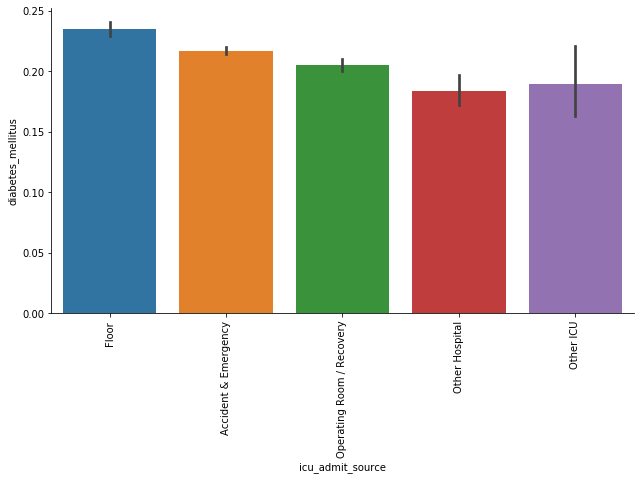

In [48]:
sns.catplot(x="icu_admit_source",y="diabetes_mellitus",kind="bar",data=train,aspect=1.8)
plt.xticks(rotation=90)
plt.show()

We can clearly see no variation in percentage of deaths for different ICU admit sources

In [49]:
#Next, we will explore the icu_admit_type column.
if "icu_admit_type" not in train.columns:
    print("Column not found")

Column not found


And there we go! We have finally found the second column which was present in the dictionary but not in the columns :)

Next, we will look at icu_id column. We will check if it is unique for every data point or if it conveys some information, just like hospital_id did.

In [50]:
train.icu_id.nunique()

328

As we can see, it has far less unique values meaning that it might be conveying important information about the specific icu in which the patient was admitted and can have some effect on the target variable.

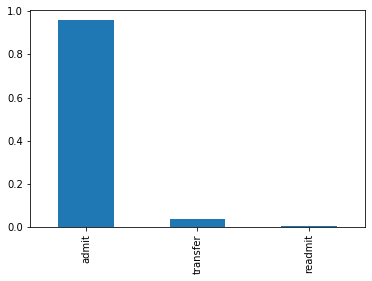

In [51]:
#Next we will look at icu_stay_type column.
train["icu_stay_type"].value_counts(normalize=True).plot(kind='bar')

As we can see, around 90% of the values are from admit category, which clearly shows the imbalance.

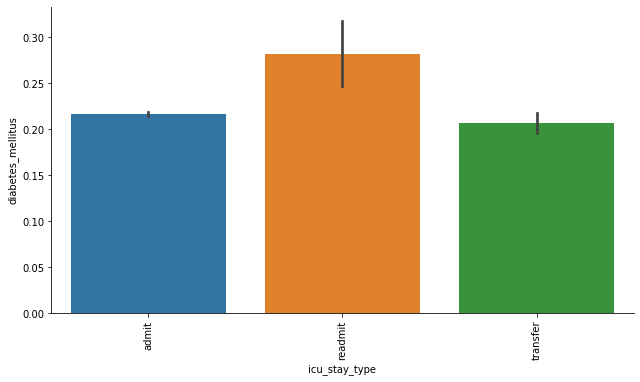

In [52]:
sns.catplot(x="icu_stay_type",y="diabetes_mellitus",kind="bar",data=train,aspect=1.8)
plt.xticks(rotation=90)
plt.show()

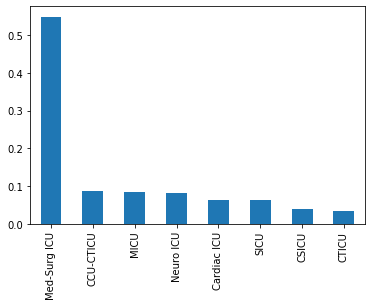

In [53]:
train["icu_type"].value_counts(normalize=True).plot(kind='bar')

As we can see above, there is a clear imbalance in the distribution of ICU types, with Med-Surg ICU being about 55%.

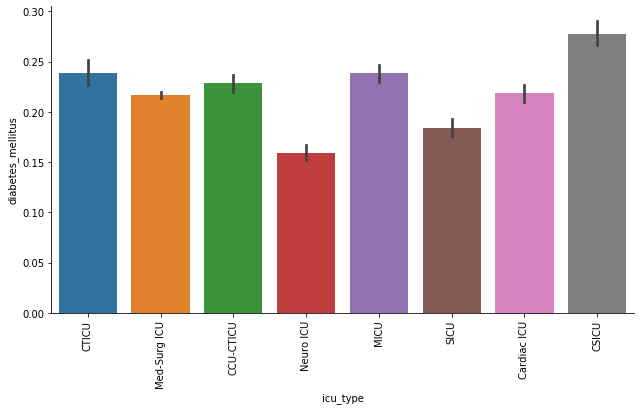

In [54]:
sns.catplot(x="icu_type",y="diabetes_mellitus",kind="bar",data=train,aspect=1.8)
plt.xticks(rotation=90)
plt.show()

There is a significant variation in percentage of hospital deaths for the ICU types which means that there is an effect of the ICU type on the target variable.

Next, we will look at pre_icu_los_days column.

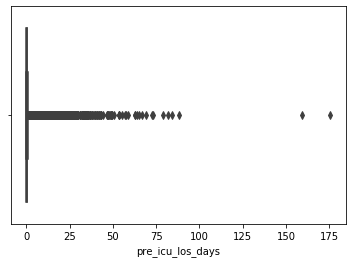

In [55]:
sns.boxplot(train["pre_icu_los_days"])

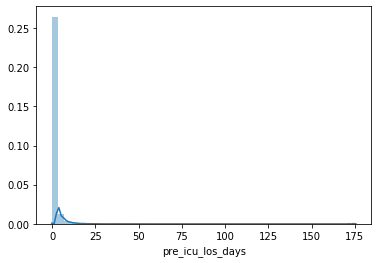

In [56]:
sns.distplot(train["pre_icu_los_days"])

The first thing that we observe is that there are large number of outliers. Let's analyse this column based on the target variable.

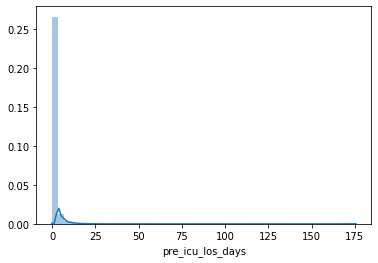

In [57]:
sns.distplot(train[train["diabetes_mellitus"]==0]["pre_icu_los_days"])

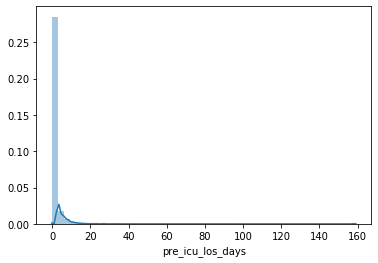

In [58]:
sns.distplot(train[train["diabetes_mellitus"]==1]["pre_icu_los_days"])

The main difference, as we can see, is that in case of diabetes_mellitus, the number of days is much lower.

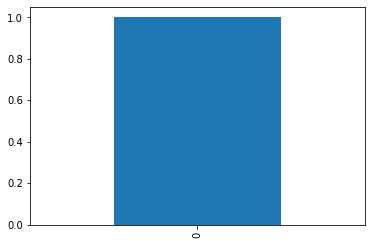

In [59]:
train["readmission_status"].value_counts(normalize=True).plot(kind='bar')

As we can see, this column has only value 0 which means that it does not provide any extra information and thus, can be dropped.

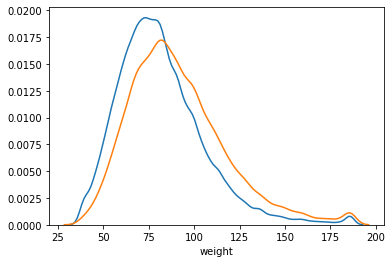

In [60]:
sns.distplot(train[train["diabetes_mellitus"]==0]["weight"],hist=False)
sns.distplot(train[train["diabetes_mellitus"]==1]["weight"],hist=False)

### Labs

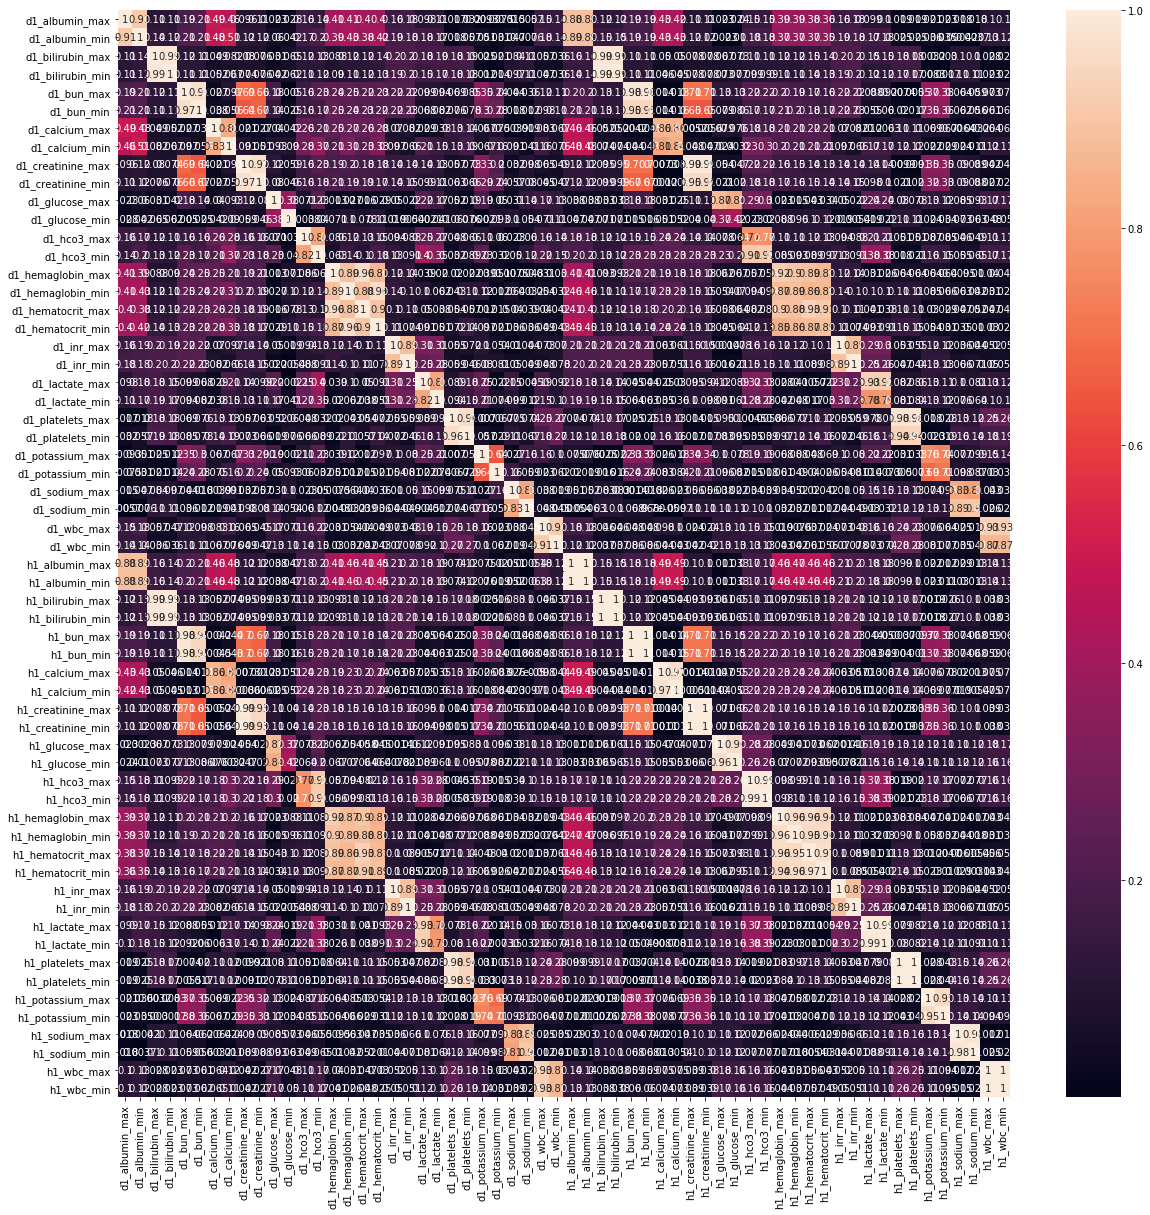

In [61]:
cols = selectCategory(dictionary,"labs")

plt.figure(figsize=(20,20))
sns.heatmap(abs(train[cols["Variable Name"]].corr()),annot=True)
plt.show()

Because of the extensive EDA, we have come up with 57 columns which can be dropped. We have also added one extra column (bmi_category) which, as we saw earlier, provides better information than bmi. Now, we can further process these columns and fit a classification model.

In [62]:
# Drop columns
train.drop(toDrop,axis=1,inplace=True)
train.shape

(130157, 180)

In [63]:
test.drop(toDrop,axis=1,inplace=True)
test.shape

(10234, 179)

# Data pre-processing

In [64]:
#Check Non data
null_counts = train.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

h1_bilirubin_min    119861
h1_bilirubin_max    119861
h1_albumin_min      119005
h1_albumin_max      119005
h1_lactate_max      118467
                     ...  
d1_sysbp_max           271
d1_heartrate_min       262
d1_heartrate_max       262
icu_admit_source       240
gender                  66
Length: 160, dtype: int64

In [65]:
train.groupby(['diabetes_mellitus']).size()

diabetes_mellitus
0    102006
1     28151
dtype: int64

In [66]:
df=train.dropna()
null_counts = df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [67]:
# Handling missing values 
def calc_missing_values(df):
    
    '''
    Returns total number and percentage of missing value in each column of a
    given dataframe.    
    '''
    # sum of missing values in each column
    missing_values = df.isnull().sum() 
    
    # percentage of missing values in each column
    per_missing = df.isnull().sum() * 100 / len(df)
    
    # Table with sum and percentage of missing values
    missing_table = pd.concat([missing_values, per_missing],axis = 1)
        
    # Assign column names
    missing_table_rename = missing_table.rename(columns ={0: 'Missing Values', 1:'% of missing values'})
    # Sort it by percentage of missing values
    
    sorted_table = missing_table_rename[missing_table_rename.iloc[:,1] !=0].\
    sort_values('% of missing values', ascending = False).round(1)
    
    print('Out of ' + str(df.shape[1])+ ' columns in this dataframe '+ str(sorted_table.shape[0])+ \
                         ' columns have missing values')
    
    return sorted_table

In [68]:
# Training data
missing_train = calc_missing_values(train)
missing_train[:20].style.background_gradient(cmap='viridis')

Out of 180 columns in this dataframe 160 columns have missing values


,Missing Values,% of missing values
h1_bilirubin_min,119861,92.100000
h1_bilirubin_max,119861,92.100000
h1_albumin_max,119005,91.400000
h1_albumin_min,119005,91.400000
h1_lactate_max,118467,91.000000
h1_lactate_min,118467,91.000000
h1_pao2fio2ratio_min,113397,87.100000
h1_pao2fio2ratio_max,113397,87.100000
h1_arterial_ph_max,107849,82.900000
h1_arterial_ph_min,107849,82.900000


In [69]:
# Test data
missing_test = calc_missing_values(test)
missing_test[:20].style.background_gradient(cmap='cividis')

Out of 179 columns in this dataframe 159 columns have missing values


,Missing Values,% of missing values
h1_lactate_min,9421,92.100000
h1_lactate_max,9421,92.100000
h1_bilirubin_min,9407,91.900000
h1_bilirubin_max,9407,91.900000
h1_albumin_max,9365,91.500000
h1_albumin_min,9365,91.500000
h1_pao2fio2ratio_min,8812,86.100000
h1_pao2fio2ratio_max,8812,86.100000
h1_arterial_ph_min,8401,82.100000
h1_arterial_ph_max,8401,82.100000


In [70]:
# removes duplicate and empty row/col
train_df =pd.DataFrame.drop_duplicates(train)
test_df  =pd.DataFrame.drop_duplicates(test)

In [71]:
#Categorical features
train_df.dtypes

Unnamed: 0                       int64
age                            float64
bmi                            float64
elective_surgery                 int64
ethnicity                       object
                                ...   
leukemia                         int64
lymphoma                         int64
solid_tumor_with_metastasis      int64
diabetes_mellitus                int64
bmi_category                    object
Length: 180, dtype: object

In [72]:
cat_col_train = train.select_dtypes('object').columns
display(len(cat_col_train))
display(cat_col_train)

7

Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'bmi_category'],
      dtype='object')

In [73]:
cat_col_test = test.select_dtypes('object').columns
display(len(cat_col_test))
display(cat_col_test)

7

Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'bmi_category'],
      dtype='object')

In [74]:
cat_list = train.select_dtypes('object').columns
display(cat_list)

Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'bmi_category'],
      dtype='object')

In [75]:
# Creating Label Encoder object
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder()
for ob in cat_list:
    train_df[ob] = le.fit_transform(train_df[ob].astype(str))
    test_df[ob] = le.fit_transform(test_df[ob].astype(str))
print(train_df.info())    
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130157 entries, 0 to 130156
Columns: 180 entries, Unnamed: 0 to bmi_category
dtypes: float64(157), int32(7), int64(16)
memory usage: 176.3 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10234 entries, 0 to 10233
Columns: 179 entries, Unnamed: 0 to bmi_category
dtypes: float64(156), int32(7), int64(16)
memory usage: 13.8 MB
None


In [77]:
#Missing data handling
train_df.fillna(-9999,inplace = True)
train_df.isnull().sum()
train_df.drop(['Unnamed: 0'], axis=1)


,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,...,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus,bmi_category
0,68.0,22.732803,0,2,1,180.3,4,1,92,0,...,-9999.0,0,0,0,0,0,0,0,1,0
1,77.0,27.421875,0,2,0,160.0,4,1,90,0,...,51.0,0,0,0,0,0,0,0,1,2
2,25.0,31.952749,0,2,0,172.7,3,0,93,0,...,-9999.0,0,0,0,0,0,0,0,0,1
3,81.0,22.635548,1,2,0,165.1,8,2,92,0,...,337.0,0,0,0,0,0,0,0,0,0
4,19.0,-9999.000000,0,2,1,188.0,15,0,91,0,...,-9999.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130152,50.0,29.287256,0,2,1,175.3,3,0,1109,0,...,-9999.0,0,0,0,0,0,0,0,0,2
130153,79.0,29.653433,0,2,0,162.6,2,0,1106,0,...,-9999.0,0,0,0,0,0,0,0,0,2
130154,73.0,32.265371,0,0,1,177.8,3,0,1104,0,...,163.0,0,0,0,0,0,0,0,1,1
130155,81.0,24.408579,0,2,1,185.4,3,0,1108,0,...,-9999.0,0,0,0,0,0,0,0,0,0


In [78]:
test_df.fillna(-9999,inplace = True)
test_df.isnull().sum()
test_df.drop(['Unnamed: 0'], axis=1)

,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,bmi_category
0,72,-9999.0,0,2,0,152.4,3,0,82,0,...,-9999.0,-9999.0,0,0,0,0,0,0,0,1
1,86,-9999.0,0,2,0,175.3,2,0,82,0,...,-9999.0,-9999.0,0,0,0,0,0,0,0,1
2,72,-9999.0,0,2,0,162.6,3,1,82,0,...,-9999.0,-9999.0,0,0,0,0,0,0,0,1
3,66,-9999.0,0,2,1,177.8,3,1,82,0,...,-9999.0,-9999.0,0,0,0,0,0,0,0,1
4,89,-9999.0,0,2,1,170.2,1,0,82,0,...,-9999.0,-9999.0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10229,36,37.5,0,2,0,170.1,3,1,1108,0,...,-9999.0,-9999.0,0,0,0,0,0,0,0,1
10230,61,32.1,0,2,0,160.0,2,0,1108,0,...,-9999.0,-9999.0,0,0,0,0,0,0,0,1
10231,74,22.7,0,2,0,165.1,9,1,1108,0,...,-9999.0,-9999.0,0,0,0,0,0,0,0,0
10232,90,19.9,0,2,0,160.0,2,0,1108,0,...,-9999.0,-9999.0,0,0,0,0,0,0,0,0


In [79]:
Target = 'diabetes_mellitus'
train_labels = train_df[Target]
train_df_NT = train_df.drop(columns = [Target])
features = list(train_df_NT.columns)
print('Training data shape:', train_df_NT.shape)
print('Test data shape:', test_df.shape)

Training data shape: (130157, 179)
Test data shape: (10234, 179)


In [80]:
X, y = train_df_NT, train_labels

# Feature selection using SelectFromModel

In [81]:
#Loading library
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import OneSidedSelection

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score,f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report, average_precision_score
# Credit to https://www.kaggle.com/khanalkiran/wids-xgboost-selectmodel/data 

In [82]:
# Tree-based feature selection
clf_f = ExtraTreesClassifier(n_estimators=50)
clf_f = clf_f.fit(X, y)
model = SelectFromModel(clf_f, prefit=True)
X_new = model.transform(X)
X_test_new = model.transform(test_df)

In [83]:
X_new.shape,X_test_new.shape

((130157, 91), (10234, 91))

In [84]:
#create the train and validation set for cross-validation
X_train, X_val, y_train, y_val = train_test_split(X_new, y, test_size=0.2, random_state=123)

In [85]:
xgb_cls = xgb.XGBClassifier(
    max_depth = 4, 
    subsample = 0.8, 
    colsample_bytree = 0.8,
    colsample_bylevel = 0.8,
    scale_pos_weight = 1,
    min_child_weight = 1,
    reg_alpha = 4,
    n_jobs = 4, 
    objective = 'binary:logistic',
    nthread=20,
   # gamma= 0.01,
    #seed = 27,
    #n_estimators=1000,
)

In [86]:
xgb_cls.fit(X_train,y_train)

y_pred = xgb_cls.predict_proba(X_val)

[12:09:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [87]:
y_scores = y_pred[:, 1]

In [88]:
fpr, tpr, _ = roc_curve(y_val, y_scores)
roc_auc = auc(fpr, tpr)
average_precision = average_precision_score(y_val, y_scores)
precision, recall, _ = precision_recall_curve(y_val, y_scores)
print(roc_auc)

0.8614124668859887


# What we have learned 
1 Understand the data	
    - Read Data Dictionary carefully & ask the questions if relevant to understand for EDA 
    - Check WIDS 2020 to see the example 
    - Get the consult from expert to make sure that data is correct (if not, we should handle wrong data later)	-Very important step to know what we are doing, if not, it may lead to mislead 
2 Data pre-processing 	
    - Data cleaning  
    - Handling wrong data: Removed records from train set with age = 0 (or missing) 
    - Missing data: 
    - Remove 
    - Fill in by MICE imputation (for weight and height using age, conducted separately by gender, and recalculated BMI)
    - Handle overfiting/imbalance data set 
3 Feature Engineering		
    - Create a lot of features based on icu_id
4 Feature Selection.We can think of many solutions:
    - Get the top 20 features from expert /Doctor to select the feature for modeling. 
    - Use feature selection library/algorithm	
    - Try to train on the whole train data set
5 Model building 	
    - Try to use Machine Learning classification algorithm (Logistic Regression/Decision Tree/ Random Forest/SVM/ Naïve Bayer..) in the loop the see the accuracies 
    - Another solution is about Deep Learning (ANN/CNN…) to test.
    - Winner advised to use Logistic regression meta-learner, LGBM, XGBOOST solutions, Deep Learning

For further info, pls refer the link https://www.kaggle.com/c/widsdatathon2021/discussion/223128 with thanks 
